In [2]:
# keras related
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# data manipulation
import numpy as np

# visualization
import matplotlib.pyplot as plt

Using TensorFlow backend.


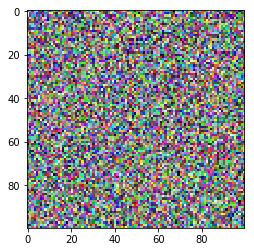

In [12]:
# Generate dummy data
x_train = np.random.random((100, 100, 100, 3)) #100 pcs of 100x100 3-channel images
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))   #20 pcs of 100x100 3-channel images
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

plt.imshow(x_train[2])
plt.show()
#np.random.randint(10, size=(100, 1))

In [13]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
100/100 [==============================] - 81s - loss: 2.3214     
Epoch 2/10
100/100 [==============================] - 0s - loss: 2.2886     
Epoch 3/10
100/100 [==============================] - 0s - loss: 2.2521     
Epoch 4/10
100/100 [==============================] - 0s - loss: 2.2897     
Epoch 5/10
100/100 [==============================] - 0s - loss: 2.2795     
Epoch 6/10
100/100 [==============================] - 0s - loss: 2.2928     
Epoch 7/10
100/100 [==============================] - 0s - loss: 2.2650     
Epoch 8/10
100/100 [==============================] - 0s - loss: 2.2783     
Epoch 9/10
100/100 [==============================] - 0s - loss: 2.2375     
Epoch 10/10
20/20 [==============================] - 0s


# keras 内置 VGG19


In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model

In [21]:
# 读入model
#base_model = VGG19(weights='imagenet')
#model = Model(input=base_model.input, 
#              output=base_model.get_layer('block4_pool').output)


model=keras.applications.vgg19.VGG19(include_top=True, 
                               weights='imagenet', 
                               input_tensor=None, 
                               input_shape=None)


Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5: None -- [Errno 110] Connection timed out